[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/crunchdao/datacrunch-notebooks/blob/master/python/exploratory_data_analysis.ipynb)

## Import Libraries

In [1]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import xgboost as xgb
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

import requests
import gc

import crunchdao

## Download data

In [2]:
client = crunchdao.Client(apikey="TFmGZ3pLNRllYyl8wGj0gO0IzskBY8v10kjVedWJBe2s9hSstzbyDwcDsrkpIqYMxO7pULSNsVIAvQeKUoxZwQAnzLVGqhYg3uEO5UYQ5oMJMAe0G18vwT4ksdh3AewF")
# Chose a file format between parquet and csv 
file_format = 'parquet'

# Download current dataset
client.download_data(directory=".", file_format=file_format)

['./X_train.parquet',
 './y_train.parquet',
 './X_test.parquet',
 './example_submission.parquet']

In [3]:
if file_format == 'parquet':
  # Data for training
  train_features = pd.read_parquet(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_parquet(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_parquet(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_parquet(f'./example_submission.{file_format}')
elif file_format == 'csv':
  # Data for training
  train_features = pd.read_csv(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_csv(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_csv(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_csv(f'./example_submission.{file_format}')

In [4]:
# Merge train_features and train_targets for ease of use
train_data = pd.merge(train_features, train_targets, on=['id', 'Moons'], how='inner')

del train_features, train_targets
gc.collect()

0

In [5]:
# Get the features columns name and the targets columns name
features = [col for col in train_data.columns if 'Feature' in col]
targets = [col for col in train_data.columns if 'target' in col]

In [6]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

import requests
import gc

import crunchdao
from sklearn.decomposition import PCA

## Download Data

In [7]:
client = crunchdao.Client(apikey="") # <= Your API key here
# Get the configuration of the current dataset
client.dataset_config()

{'round': {'id': 156,
  'number': 2,
  'absoluteNumber': 131,
  'start': '2023-06-23T17:00:00',
  'end': '2023-06-27T09:00:00',
  'batch': {'id': 50,
   'number': 32,
   'absoluteNumber': 34,
   'start': '2023-06-18',
   'end': '2023-07-12',
   'hackathon': False,
   'open': True,
   'over': False},
  'dataset': {'id': 11,
   'name': 'master',
   'description': 'all in one',
   'hidden': False,
   'leaderboardDisabled': False},
  'updated': True,
  'periods': {'white': 'P8D', 'red': 'P30D', 'green': 'P60D', 'blue': 'P90D'},
  'inception': '2023-06-22',
  'forcedStart': None,
  'moonsDuration': 'P7D',
  'negativePrevented': False,
  'published': True,
  'threadPoolSize': 4,
  'minimumDaysForUsableTarget': 5,
  'universeFile': 'hash_table',
  'offset': 'P0D',
  'benchmark': '^RUI',
  'columnSuffix': '',
  'metric': 'SPEARMAN',
  'targetType': 'ALPHA_V5',
  'open': False,
  'over': True,
  'batchId': 50,
  'datasetId': 11,
  'scoringStart': '2023-06-27'},
 'live': True,
 'forced_start': N

In [8]:
# Chose a file format between parquet and csv 
file_format = 'parquet'

# Download current dataset
client.download_data(directory=".", file_format=file_format)

['./X_train.parquet',
 './y_train.parquet',
 './X_test.parquet',
 './example_submission.parquet']

In [9]:
if file_format == 'parquet':
  # Data for training
  train_features = pd.read_parquet(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_parquet(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_parquet(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_parquet(f'./example_submission.{file_format}')
elif file_format == 'csv':
  # Data for training
  train_features = pd.read_csv(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_csv(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_csv(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_csv(f'./example_submission.{file_format}')

In [10]:
# Merge train_features and train_targets for ease of use
train_data = pd.merge(train_features, train_targets, on=['id', 'Moons'], how='inner')

del train_features, train_targets
gc.collect()

0

In [11]:
# Get the features columns name and the targets columns name
features = [col for col in train_data.columns if 'Feature' in col]
targets = [col for col in train_data.columns if 'target' in col]

# EDA

In [12]:
train_data.head()

,id,Moons,vratios_Feature_1,vratios_Feature_2,vratios_Feature_3,vratios_Feature_4,vratios_Feature_5,vratios_Feature_6,vratios_Feature_7,vratios_Feature_8,...,cmechanics_Feature_92,cmechanics_Feature_93,cmechanics_Feature_94,cmechanics_Feature_95,cmechanics_Feature_96,cmechanics_Feature_97,target_w,target_r,target_g,target_b
0,192186,0,0.50,0.50,0.67,0.67,0.33,0.17,0.33,0.83,...,0.50,0.33,0.67,0.50,0.33,0.17,0.33,0.33,0.50,0.5
1,28918,0,0.50,0.50,0.33,0.33,0.33,0.33,0.50,0.50,...,0.67,0.83,0.17,0.00,0.33,0.50,0.50,0.50,0.67,0.5
2,240280,0,0.67,0.50,0.00,0.00,0.00,0.33,0.50,0.67,...,0.17,0.50,0.33,0.50,0.50,0.33,0.67,1.00,0.83,1.0
3,282296,0,0.33,0.33,0.50,0.50,0.33,0.17,0.33,1.00,...,0.33,0.33,0.50,0.17,0.00,0.00,0.33,0.33,0.50,0.5
4,3907,0,0.67,0.33,0.33,0.33,0.33,0.33,0.50,0.50,...,0.50,0.50,0.67,0.67,0.50,0.67,0.50,0.50,0.50,0.5


In [13]:
train_data.tail()

,id,Moons,vratios_Feature_1,vratios_Feature_2,vratios_Feature_3,vratios_Feature_4,vratios_Feature_5,vratios_Feature_6,vratios_Feature_7,vratios_Feature_8,...,cmechanics_Feature_92,cmechanics_Feature_93,cmechanics_Feature_94,cmechanics_Feature_95,cmechanics_Feature_96,cmechanics_Feature_97,target_w,target_r,target_g,target_b
317316,156988,369,0.67,0.67,0.50,0.50,0.33,0.33,0.50,0.67,...,0.83,0.50,0.50,0.50,0.67,0.50,0.67,0.83,0.50,0.50
317317,2246,369,0.67,0.17,0.50,0.33,0.50,0.33,0.67,0.50,...,0.50,0.50,0.67,0.83,1.00,1.00,0.83,1.00,0.67,0.67
317318,305196,369,0.67,0.67,0.50,0.50,0.50,0.50,0.67,0.50,...,0.50,0.33,0.67,0.50,0.50,0.33,0.33,0.33,0.67,0.83
317319,212724,369,0.50,0.67,0.50,0.50,0.33,0.33,0.50,0.33,...,0.50,0.50,0.67,0.83,0.33,0.83,0.50,0.50,0.50,0.33
317320,133993,369,0.83,0.67,0.83,0.67,0.83,0.83,0.83,0.67,...,0.67,1.00,0.17,0.17,0.33,0.33,0.50,0.50,0.33,0.50


In [14]:
train_data.describe()

,id,Moons,vratios_Feature_1,vratios_Feature_2,vratios_Feature_3,vratios_Feature_4,vratios_Feature_5,vratios_Feature_6,vratios_Feature_7,vratios_Feature_8,...,cmechanics_Feature_92,cmechanics_Feature_93,cmechanics_Feature_94,cmechanics_Feature_95,cmechanics_Feature_96,cmechanics_Feature_97,target_w,target_r,target_g,target_b
count,317321.0,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,...,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000,317321.000000
mean,164392.994302,182.474844,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.499996,0.500000,0.499998
std,94871.20038,106.627756,0.232241,0.232241,0.232241,0.232241,0.232241,0.232241,0.232241,0.232241,...,0.232241,0.232241,0.232241,0.232241,0.232241,0.232241,0.130263,0.175747,0.146633,0.185026
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82254.0,90.000000,0.330000,0.330000,0.330000,0.330000,0.330000,0.330000,0.330000,0.330000,...,0.330000,0.330000,0.330000,0.330000,0.330000,0.330000,0.500000,0.330000,0.500000,0.330000
50%,164398.0,181.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,246520.0,275.000000,0.670000,0.670000,0.670000,0.670000,0.670000,0.670000,0.670000,0.670000,...,0.670000,0.670000,0.670000,0.670000,0.670000,0.670000,0.500000,0.670000,0.500000,0.670000
max,328719.0,369.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
test_data.head()

,id,Moons,vratios_Feature_1,vratios_Feature_2,vratios_Feature_3,vratios_Feature_4,vratios_Feature_5,vratios_Feature_6,vratios_Feature_7,vratios_Feature_8,...,cmechanics_Feature_88,cmechanics_Feature_89,cmechanics_Feature_90,cmechanics_Feature_91,cmechanics_Feature_92,cmechanics_Feature_93,cmechanics_Feature_94,cmechanics_Feature_95,cmechanics_Feature_96,cmechanics_Feature_97
0,53174,370,0.17,0.17,0.33,0.33,0.17,0.17,0.33,0.50,...,0.33,0.17,0.50,0.17,0.50,0.67,0.33,0.33,0.33,0.67
1,167191,370,0.33,0.00,0.00,0.00,0.17,0.17,0.33,0.33,...,0.67,0.50,0.83,0.50,0.50,0.67,0.33,0.33,0.17,0.17
2,127094,370,0.33,0.50,0.17,0.33,0.17,0.33,0.33,0.33,...,0.50,0.67,0.67,0.67,0.83,0.33,0.83,1.00,0.17,0.17
3,115077,370,0.67,0.67,0.50,0.33,0.33,0.33,0.50,0.67,...,0.50,0.50,0.33,0.50,0.67,0.50,0.50,0.67,0.50,0.67
4,109783,370,0.50,0.50,0.67,0.67,0.83,0.50,0.50,0.50,...,1.00,0.50,0.67,0.50,0.17,0.67,0.50,0.33,0.33,0.67


### Number of stocks overtime

<Axes: xlabel='Moons'>

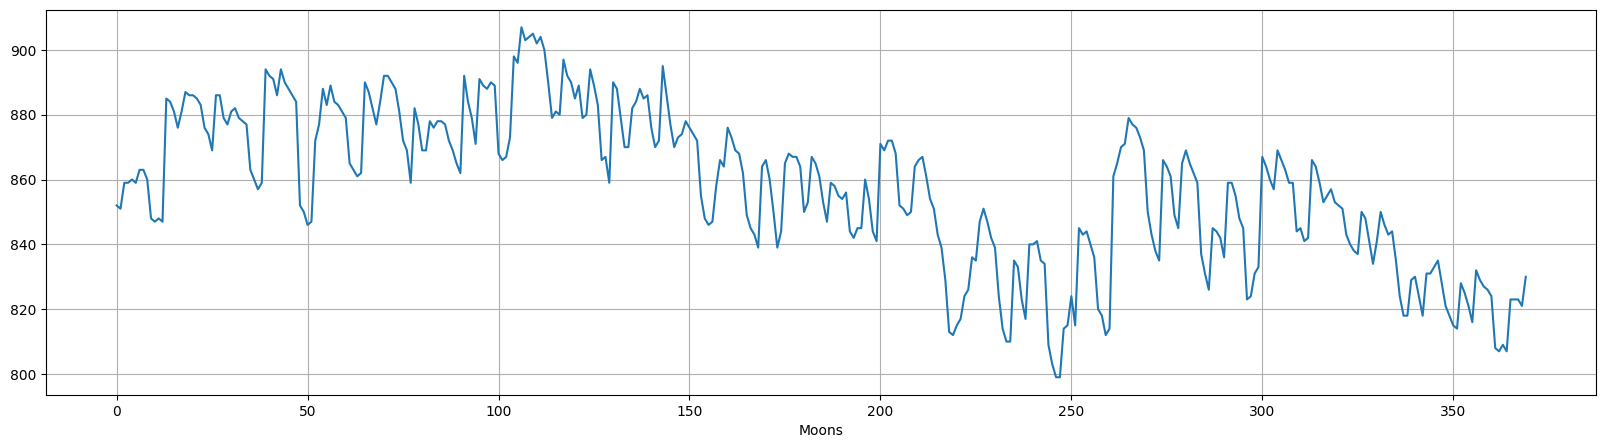

In [16]:
# Show the number of stocks in each moon 
train_data.groupby('Moons', group_keys=False).id.count().plot(figsize=(20, 5), grid='on')

We start looking at the reference statistics of features and targets.

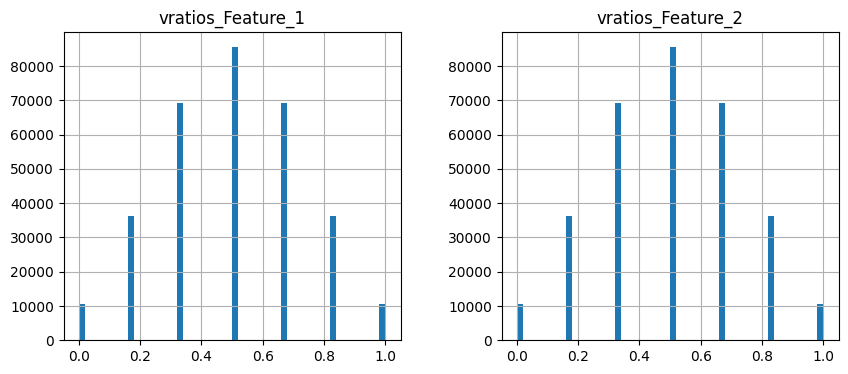

In [17]:
# Train data binning explained and plot
hist = train_data[features].iloc[:, :2].hist(bins=50, figsize=(10,4))

Each feature X is a normalized and quantized Gaussian, leading to a multivariate quantized Gaussian Process.

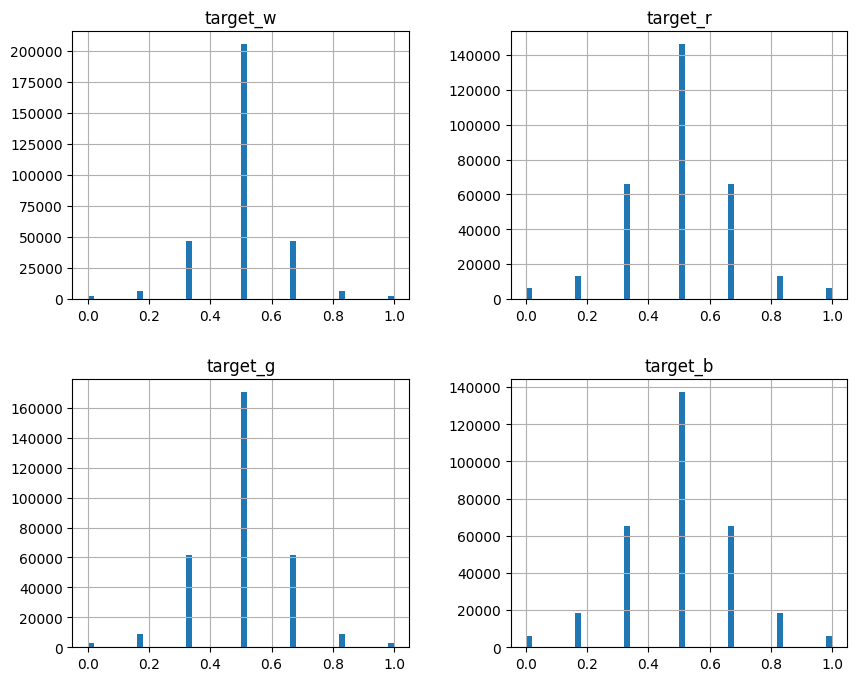

In [18]:
# Target explained and plot
hist = train_data[targets].hist(bins=50, figsize=(10,8))

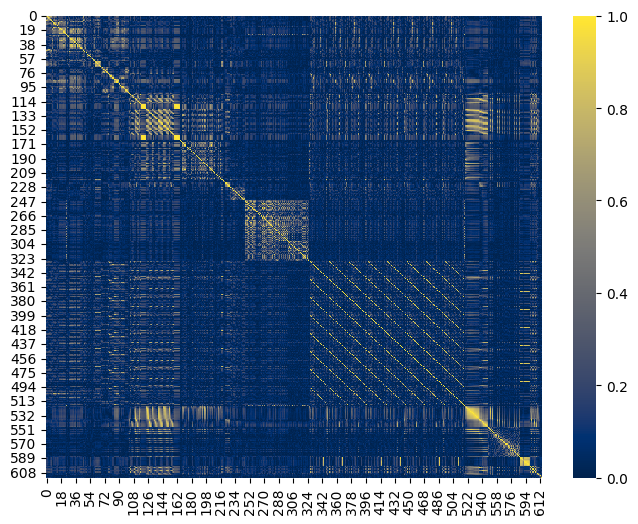

In [19]:
def show_cov(x):
    cov = x.corr().abs().to_numpy()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cov,vmin=0, vmax=1, cmap="cividis")
    plt.show()

# Show last moon covariance matrix
train_data_last = train_data.loc[train_data['Moons'] == train_data['Moons'].max(), features]
show_cov(train_data_last)

Each target y is a normalized and quantized T-Student. 

The Xy(t) matrix is associated with a [StudentTProcess](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/StudentTProcess).

## Feature Covariance Norm

In [20]:
X = train_data[['Moons'] + features]

In [21]:
def frob_cov(x):
    cov = x.iloc[:, 1:].corr()
    return np.linalg.norm(cov)

In [22]:
frob_norm = X.groupby('Moons').apply(lambda x: frob_cov(x))

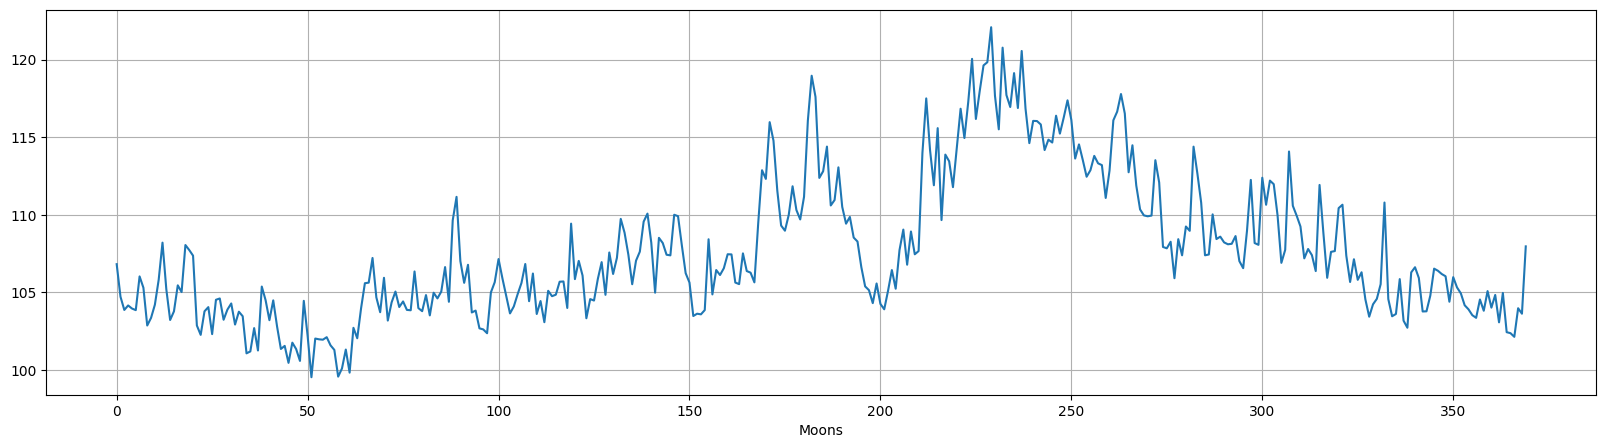

In [23]:
plt.figure(figsize=(20, 5))
frob_norm.plot()
plt.grid()

---

### Credits

Created by: [Jeremy Berros](https://github.com/jberros)

Greatly inspired by the work from: [Jon Taylor](https://github.com/jonrtaylor)

Updated by: [Matteo Manzi](https://github.com/matteoettam09)